In [1]:
from numpy import *
from matplotlib.pylab import *
%matplotlib inline

In [2]:
import pickle


In [3]:
with open("data_Fullset/Fullset.pkl","rb") as f:
    data = pickle.load(f)

In [4]:
def ellipsoid(a= 1,b = 1, alpha=0,  np = 101):
    th = linspace(alpha,2*pi-alpha,np)
    x = a*sin(th+pi)
    y = b*cos(th+pi)
    return((x,y))

def simplesp(D0,D1,Dn,Ln):
    db = D1/2.0#/D0
    dnb = min(Dn/D1,1)
    alpha = arcsin(dnb)
    xe,ye = ellipsoid(db,D0/2.0,alpha)
    y0n = linspace(0,-Ln,3)-D0/2.0
    x0nl = y0n*0-Dn/2.0
    x0nr = y0n*0+Dn/2.0
    x = concatenate((x0nl,xe,x0nr))
    y = concatenate((y0n,ye,y0n))
    return((x,y))

def kinksp(D0,D1,Dn,Ln,Dnmin):
    db = D1/2.0#/D0
    dnb = min(Dn/D1,1)
    alpha = arcsin(dnb)
    xe,ye = ellipsoid(db,D0/2.0,alpha)
    headbase = -D0*cos(alpha)/2.0
    y0n = linspace(0,-Ln,100)+headbase
    yb = linspace(0,-Ln,3)+headbase
    x0 = Dnmin+(y0n-yb[1])**2/(Ln/2)**2*(Dn-Dnmin)
    x0nl = y0n*0-x0/2.0
    x0nr = y0n*0+x0/2.0
    sel = arange(len(y0n),0,-1)-1
    x = concatenate((x0nl,xe,x0nr))
    y = concatenate((y0n[sel],ye,y0n))
    return((x,y))

def generatesp(i,lplot = False):
    D0 = data['Lhead'][i]
    D1 = data['maxDhead'][i]/1e3
    Dn = data['meanDneck'][i]/1e3
    Ln = data['Lneck'][i]
    sp = kinksp(D0,D1,Dn,Ln,data['minDneck'][i]/1e3)
    if lplot == True:
        plot(sp[0],sp[1],'-')
    return(sp)

In [5]:
#xkcd()

In [10]:
D0 = data['Lhead']
D1 = data['maxDhead']/1e3
Dn = data['meanDneck']/1e3
Dm = data['minDneck']/1e3
Ln = data['Lneck']

D0s = [D0[4],D0[37],D0[28],D0[28]]
D1s = [D1[4],D1[37],D1[28],D1[28]]
Dns = [Dn[4],Dn[37],Dn[28],Dn[28]]
Dms = [Dm[4],Dm[37],Dm[28],Dm[28]]

Lns = [Ln[4],Ln[37],Ln[4],Ln[28]]

Text(-0.4,0.08,'0.1 $\\mu$ m')

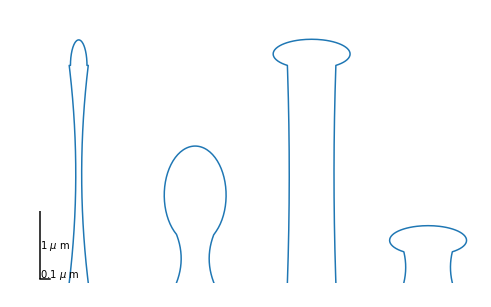

In [11]:
fig,ax = subplots(1,4,figsize = (2*4,5*1))
D0 = data['Lhead'].mean()
D1 = data['maxDhead'].mean()/1e3
Dn = data['meanDneck'].mean()/1e3
Ln = data['Lneck'].mean()
sp = kinksp(D0,D1,Dn,Ln,mean(data['minDneck']/1e3))

for i in range(2):
    for j in range(2):
        D0 = D0s[i+j*2]
        D1 = D1s[i+j*2]
        Dn = Dns[i+j*2]
        Ln = Lns[i+j*2]
        Dm = Dms[i+j*2]
        sp = kinksp(D0,D1,Dn,Ln,Dm)
        ax[i+2*j].plot(sp[0],sp[1]-min(sp[1]))
        ax[i+2*j].set_xlim(-.5,.5)
        ax[i+2*j].set_ylim(0,4)
        ax[i+2*j].axis('off')
        ax[i+2*j].axis('off')
ax[0].vlines(-0.4,0.05,1.05)
ax[0].plot(linspace(-0.4,-0.3),linspace(-0.4,-0.3)*0+0.05,'k')
ax[0].annotate('1 $\mu$ m',xy = (-0.4,0.5))
ax[0].annotate('0.1 $\mu$ m',xy = (-0.4,0.08))

In [13]:
#figure(figsize=(2,5))
for k in range(4):
    fig,ax = subplots(4,4,figsize = (2*4,5*4))
    for i in range(4):
        for j in range(4):
            sp = generatesp(randint(170))
            ax[i,j].plot(sp[0],sp[1]-min(sp[1]))
            ax[i,j].set_xlim(-.5,.5)
            ax[i,j].set_ylim(0,max(3,max(sp[1])*1.05))
            ax[i,j].axis('off')
    #fig.savefig('spines_'+str(k)+'.png')
    fig.clear()

<Figure size 576x1440 with 0 Axes>

<Figure size 576x1440 with 0 Axes>

<Figure size 576x1440 with 0 Axes>

<Figure size 576x1440 with 0 Axes>

In [16]:
import os, sys
folder = "profiles/"


In [21]:
spines = {}


KeyError: 'k1'

In [84]:
files = os.listdir(folder)
files.sort()
spines = {}
for fl in files:
    if fl[-4:] == '.dat' and fl.find('px') > -1:
        spchs = fl.split('.')[0].split('_')
        spname = spchs[-1]
        if spname not in spines.keys():
            spines[spname] = {'Head':{}, 'Neck':{}}
        spfeat = spchs[0]
        if spfeat == 'Head':
            spfea2 = spchs[1]
            spines[spname][spfeat][spfea2] = loadtxt(folder+fl)
        else:
            spines[spname]['Neck'][spfeat] = loadtxt(folder+fl)
    


In [85]:
spines.keys()

dict_keys(['sA', 'sB', 'sC', 'sD', 'sE', 'sF', 'sG', 'sH', 'sI', 'sJ', 'sK'])

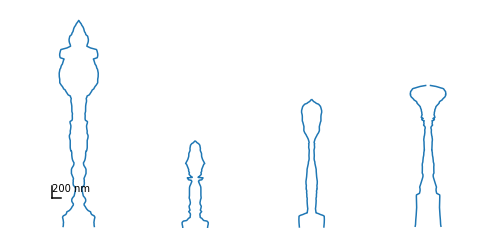

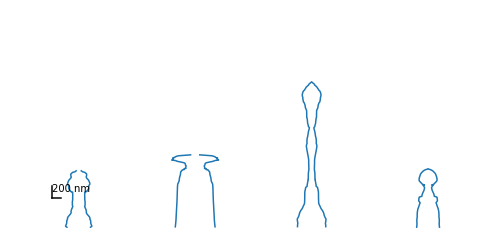

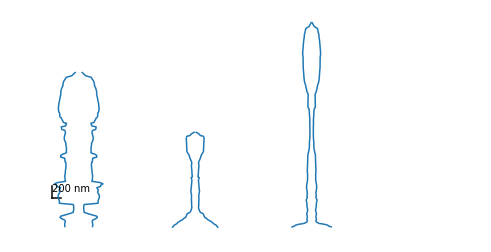

In [97]:
pxdim = 2.5e-3
xfmax = 3
axs = []
for ik,spk in enumerate(spines.keys()):
    sp = spines[spk]
    try:
        rH, dH = 1.0*sp['Head']['path'],1.0*sp['Head']['diam']
        rN, dN = 1.0*sp['Neck']['path'],1.0*sp['Neck']['diam']
    except Exception as e:
        print(e)
        
    rH = rH[::-1,:]
    dH = dH[::-1]
    
    rN0 = rN[:1,:]
    rN = rN-rN0+rH[-1:,:]
    
    rf = row_stack((rH,rN))
    df = concatenate((dH,dN))
    
    dx = sqrt(((rf[1:,:]-rf[:-1,:])**2).sum(axis=1))
    #xf = concatenate(([0],dx.cumsum()))
    xf = dx.cumsum()
    
    xf = xf[::-1]
    #df = df[]
    #break
    i = ik%4
    if i==0:
        fig,ax = subplots(1,4,figsize = (2*4,4))
        ax[0].plot(linspace(-0.7+.05,-0.7+.20+.05),linspace(-0.7,-0.7+.20)*0+0.5,'k-')
        ax[0].plot(linspace(0.5,.5+.20)*0-0.7+.05,linspace(0.5,.5+.20),'k-')
        ax[0].annotate('200 nm', xy = (-0.7+.05,.6))
    #or i in range(4):
        #for j in range(4):
        #sp = generatesp(randint(170))
    ax[i].plot(df*pxdim/2.0,xf*pxdim,'C0')
    ax[i].plot(-df*pxdim/2.0,xf*pxdim,'C0')
    ax[i].set_xlim(-1.2,1.2)
    xfmax = max(xfmax,max(xf*pxdim)*1.05)
    ax[i].set_ylim(0,xfmax)
    ax[i].axis('off')
    if i==3:
        axs.append(ax)

for j in range(i,4):
    ax[j].axis('off')
    
for ax in axs:
    for i in range(4):
        ax[i].set_ylim(0,xfmax)